## EEG Data Analysis 


#### Summary of Project - 

Scientists and researchers have been studying the benefits of meditation on the human brain and body. An enthused group of UHD students, led by an inspired professor, studied the mindfulness intervention of meditation on brain training using scientific machine-learning methods and EEG (Electroencephalogram) analysis. 

The project collects EEG signals from volunteers in 3 stages. At the pre-meditation stage, volunteers play online brain training games while EEG signals of their brain and game scores are collected. In the meditation (med) stage, the volunteers play a virtual reality meditation game for 10 minutes while EEG signals are collected. At the post-meditation stage, the volunteers play the same brain training games that they previously played while EEG signals and game scores are collected. The scores recorded during the pre-meditation and post-meditation stages are compared, while collected EEG data are processed using multiple machine-learning methods. On average, the post-meditation score of the volunteer is higher than the pre-meditation score by around 15%. 

Various machine learning methods also return high accuracies in classifying the EEG data read in 3 stages.
This study gives positive indicators that meditation can enhance brain training performance and sheds light on the further development of contemplative practices for enhancing learning effectiveness. 


In this project, I clean, prepare, and analyze collected EEG Data using various machine learning models such as KNN, Linear Discriminant Analysis, and Naive Bayes. Below is the python code I used to clean and apply various ML models to the data. Attached to the application is the research poster for this project titled "SkillShowcase2_EEGDataAnalysis.pdf."


### Data Preparation - 

Below, the data is cleaned and prepared before it is analyzed. 

In [1]:
#Import libraries to be used

import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as set_theme
import matplotlib.pyplot as plt
import pyeeg
from pyeeg import bin_power
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
#"Pre" subject data is combined using vertical stack

#subject2
data_pre2 = loadmat("Pre2.mat")
eeg_pre2 = data_pre2['data']
eeg_pre2 = pd.DataFrame(eeg_pre2)
eeg_sub2_pre = eeg_pre2.T

#subject3
data_pre3 = loadmat("Pre3.mat")
eeg_pre3 = data_pre3['data']
eeg_pre3 = pd.DataFrame(eeg_pre3)
eeg_sub3_pre = eeg_pre3.T

#subject4
data_pre4 = loadmat("Pre4.mat")
eeg_pre4 = data_pre4['data']
eeg_pre4 = pd.DataFrame(eeg_pre4)
eeg_sub4_pre = eeg_pre4.T

#subject5
data_pre5 = loadmat("Pre5.mat")
eeg_pre5 = data_pre5['data']
eeg_pre5 = pd.DataFrame(eeg_pre5)
eeg_sub5_pre = eeg_pre5.T

#subject6
data_pre6 = loadmat("Pre6.mat")
eeg_pre6 = data_pre6['data']
eeg_pre6 = pd.DataFrame(eeg_pre6)
eeg_sub6_pre = eeg_pre6.T

#dataframes combined
eeg_pre = pd.concat([eeg_sub2_pre,eeg_sub3_pre, eeg_sub4_pre, eeg_sub5_pre, eeg_sub6_pre], ignore_index= True)

#print df
eeg_pre

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,13643.919922,14060.882812,18679.255859,22400.628906,4924.961914,6554.326660,-16047.900391,-7992.140137,28438.486328,19677.937500,...,2088.012939,-4371.442871,39742.054688,9045.572266,5135.924805,16410.115234,31358.681641,36296.144531,-351.820892,248.109894
1,13525.971680,10490.278320,15710.529297,18064.501953,4551.153320,6383.905273,-16074.586914,-8023.656738,23487.933594,19681.964844,...,1781.255859,-4480.861328,34387.007812,8857.141602,4974.464355,16319.049805,26651.888672,28120.605469,-348.890564,240.994095
2,13452.542969,6312.585938,11700.387695,12661.785156,4110.976074,6210.788574,-16098.162109,-8039.494141,16670.246094,19698.263672,...,1475.233643,-4609.969238,26009.535156,8736.840820,4853.587402,16234.202148,20237.041016,18143.546875,-356.276672,229.713745
3,13425.159180,2172.124268,7108.073242,6704.074219,3721.998047,6028.488281,-16126.399414,-8035.772461,8312.787109,19731.519531,...,1240.415405,-4750.874023,14586.327148,8725.070312,4804.665527,16165.805664,12534.273438,6717.471191,-370.586304,216.896744
4,13437.347656,-1041.378052,3085.157471,1669.562866,3438.321289,5931.626953,-16146.580078,-8016.382324,693.829651,19757.798828,...,1085.491333,-4865.194824,3482.537109,8780.742188,4819.902832,16115.890625,5599.876953,-3178.594482,-386.644867,209.601822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370363,21617.175781,31112.751953,20237.052734,17669.830078,24649.568359,14072.834961,14606.913086,22415.367188,20944.398438,17882.869141,...,24476.525391,10344.198242,16302.542969,21874.832031,19081.849609,63265.421875,26145.554688,13803.855469,-407.911804,213.096130
370364,11190.977539,20672.416016,9879.426758,16061.584961,21364.173828,3742.059570,4195.910645,21519.673828,21037.644531,14989.838867,...,14122.697266,12562.308594,16141.314453,11562.951172,8706.721680,60483.339844,16264.356445,14892.518555,-403.532501,217.902481
370365,-7179.302734,2267.328857,-8341.203125,12684.416016,15588.268555,-14414.073242,-14146.889648,19285.433594,20362.416016,9728.368164,...,-4063.231445,17119.152344,15812.799805,-6571.878906,-9544.805664,55144.679688,-842.330322,16987.333984,-389.380432,223.801010
370366,-27298.425781,-17860.728516,-28373.212891,8639.484375,9062.401367,-34472.500000,-34264.476562,16409.832031,19140.048828,3710.796631,...,-24129.267578,22974.386719,15528.926758,-26613.660156,-29652.806641,48412.324219,-20356.947266,19530.378906,-363.760803,231.262665


In [3]:
#checks for zeros in the data
eeg_pre.loc[eeg_pre[1] == 0]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
191814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#remove rows with zeros
eeg_pre.drop(eeg_pre.loc[eeg_pre[1]==0].index, inplace=True)

#checks for any remaining zeros - zero are remaining. Pre phase data has been prepared.
eeg_pre.loc[eeg_pre[1]==0]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33


In [5]:
#print df
eeg_pre

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,13643.919922,14060.882812,18679.255859,22400.628906,4924.961914,6554.326660,-16047.900391,-7992.140137,28438.486328,19677.937500,...,2088.012939,-4371.442871,39742.054688,9045.572266,5135.924805,16410.115234,31358.681641,36296.144531,-351.820892,248.109894
1,13525.971680,10490.278320,15710.529297,18064.501953,4551.153320,6383.905273,-16074.586914,-8023.656738,23487.933594,19681.964844,...,1781.255859,-4480.861328,34387.007812,8857.141602,4974.464355,16319.049805,26651.888672,28120.605469,-348.890564,240.994095
2,13452.542969,6312.585938,11700.387695,12661.785156,4110.976074,6210.788574,-16098.162109,-8039.494141,16670.246094,19698.263672,...,1475.233643,-4609.969238,26009.535156,8736.840820,4853.587402,16234.202148,20237.041016,18143.546875,-356.276672,229.713745
3,13425.159180,2172.124268,7108.073242,6704.074219,3721.998047,6028.488281,-16126.399414,-8035.772461,8312.787109,19731.519531,...,1240.415405,-4750.874023,14586.327148,8725.070312,4804.665527,16165.805664,12534.273438,6717.471191,-370.586304,216.896744
4,13437.347656,-1041.378052,3085.157471,1669.562866,3438.321289,5931.626953,-16146.580078,-8016.382324,693.829651,19757.798828,...,1085.491333,-4865.194824,3482.537109,8780.742188,4819.902832,16115.890625,5599.876953,-3178.594482,-386.644867,209.601822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370363,21617.175781,31112.751953,20237.052734,17669.830078,24649.568359,14072.834961,14606.913086,22415.367188,20944.398438,17882.869141,...,24476.525391,10344.198242,16302.542969,21874.832031,19081.849609,63265.421875,26145.554688,13803.855469,-407.911804,213.096130
370364,11190.977539,20672.416016,9879.426758,16061.584961,21364.173828,3742.059570,4195.910645,21519.673828,21037.644531,14989.838867,...,14122.697266,12562.308594,16141.314453,11562.951172,8706.721680,60483.339844,16264.356445,14892.518555,-403.532501,217.902481
370365,-7179.302734,2267.328857,-8341.203125,12684.416016,15588.268555,-14414.073242,-14146.889648,19285.433594,20362.416016,9728.368164,...,-4063.231445,17119.152344,15812.799805,-6571.878906,-9544.805664,55144.679688,-842.330322,16987.333984,-389.380432,223.801010
370366,-27298.425781,-17860.728516,-28373.212891,8639.484375,9062.401367,-34472.500000,-34264.476562,16409.832031,19140.048828,3710.796631,...,-24129.267578,22974.386719,15528.926758,-26613.660156,-29652.806641,48412.324219,-20356.947266,19530.378906,-363.760803,231.262665


In [6]:
#"Med" subject data is combined using vertical stack

#subject2
data_med2 = loadmat("Med2.mat")
eeg_med2 = data_med2['data']
eeg_med2 = pd.DataFrame(eeg_med2)
eeg_sub2_med = eeg_med2.T

#subject3
data_med3 = loadmat("Med3.mat")
eeg_med3 = data_med3['data']
eeg_med3 = pd.DataFrame(eeg_med3)
eeg_sub3_med = eeg_med3.T

#subject4
data_med4 = loadmat("Med4.mat")
eeg_med4 = data_med4['data']
eeg_med4 = pd.DataFrame(eeg_med4)
eeg_sub4_med = eeg_med4.T

#subject5
data_med5 = loadmat("Med5.mat")
eeg_med5 = data_med5['data']
eeg_med5 = pd.DataFrame(eeg_med5)
eeg_sub5_med = eeg_med5.T

#subject6
data_med6 = loadmat("Med6.mat")
eeg_med6 = data_med6['data']
eeg_med6 = pd.DataFrame(eeg_med6)
eeg_sub6_med = eeg_med6.T

#dataframes combined
eeg_med = pd.concat([eeg_sub2_med,eeg_sub3_med, eeg_sub4_med, eeg_sub5_med, eeg_sub6_med], ignore_index= True)

#print df
eeg_med

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,26259.857422,2009.733154,28090.000000,42271.074219,-8650.277344,1722.738403,-19627.244141,-9204.591797,55257.808594,-4569.274902,...,5835.814941,-7103.768066,94594.585938,-11889.378906,-18303.828125,34.851871,17554.845703,91939.500000,-294.532227,294.708221
1,26794.244141,2137.634033,28676.966797,43733.933594,-8785.961914,1676.961304,-19645.691406,-9221.679688,58092.660156,-4487.894043,...,5794.921875,-7247.525879,100603.304688,-12044.568359,-18537.486328,-62.834072,17610.416016,96866.859375,-297.811523,304.050781
2,23075.968750,2248.863525,24378.878906,37666.125000,-8981.741211,1689.315674,-19633.677734,-9205.192383,50428.109375,-4399.954102,...,5759.659180,-7346.881348,88976.968750,-12091.827148,-18645.906250,-110.146797,17678.847656,85116.312500,-313.762299,288.498840
3,17975.134766,2325.780029,18576.339844,29398.015625,-9172.744141,1712.723267,-19615.226562,-9179.901367,39631.332031,-4338.440918,...,5726.496094,-7407.658691,72351.757812,-12108.112305,-18689.796875,-137.780548,17729.562500,68698.734375,-333.230896,265.573730
4,11527.055664,2390.524658,11292.817383,19101.996094,-9374.123047,1727.509644,-19592.234375,-9150.342773,25965.417969,-4286.919922,...,5690.771484,-7457.873047,50804.261719,-12116.555664,-18708.535156,-162.187775,17772.898438,47673.156250,-360.578888,239.606110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461307,-13555.524414,-1473.595581,-20630.701172,5804.506836,10225.352539,-19880.718750,-22657.712891,32520.562500,-13916.436523,2817.155273,...,2262.710205,-24530.728516,-5412.583008,-5615.913574,-13919.443359,-5726.346680,-5663.825684,-5056.235840,-390.442627,225.414963
2461308,-13489.071289,-1399.757690,-20593.386719,-9613.994141,-3792.188965,-19854.449219,-22591.962891,15439.464844,-13934.542969,-13742.703125,...,2283.819336,-46435.941406,-5376.020020,-5558.367188,-13982.644531,-5755.818848,-5734.606445,-5043.822754,-417.135803,233.774872
2461309,-13396.108398,-1297.802612,-20563.041016,-33402.753906,-26573.214844,-19795.468750,-22498.539062,-10246.837891,-13973.671875,-38138.730469,...,2296.655029,-65432.875000,-5318.959473,-5476.000000,-14125.711914,-5844.192383,-5880.622559,-5011.054199,-445.187103,265.116211
2461310,-13413.068359,-1322.858032,-20590.130859,-55042.765625,-47050.996094,-19756.605469,-22516.355469,-33308.027344,-13938.365234,-59580.531250,...,2300.708984,-73048.734375,-5308.617676,-5486.414551,-14132.009766,-5882.864746,-5891.367188,-4990.443848,-462.838654,289.734894


In [7]:
#check for zeros in data
eeg_med.loc[eeg_med[1] == 0]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
194944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2457213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2457214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2457215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#remove rows with zeros
eeg_med.drop(eeg_med.loc[eeg_med[1]==0].index, inplace=True)

#checks for any remaining zeros - zero are remaining. Med phase data has been prepared.
eeg_med.loc[eeg_med[1]==0]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33


In [9]:
#print df
eeg_med

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,26259.857422,2009.733154,28090.000000,42271.074219,-8650.277344,1722.738403,-19627.244141,-9204.591797,55257.808594,-4569.274902,...,5835.814941,-7103.768066,94594.585938,-11889.378906,-18303.828125,34.851871,17554.845703,91939.500000,-294.532227,294.708221
1,26794.244141,2137.634033,28676.966797,43733.933594,-8785.961914,1676.961304,-19645.691406,-9221.679688,58092.660156,-4487.894043,...,5794.921875,-7247.525879,100603.304688,-12044.568359,-18537.486328,-62.834072,17610.416016,96866.859375,-297.811523,304.050781
2,23075.968750,2248.863525,24378.878906,37666.125000,-8981.741211,1689.315674,-19633.677734,-9205.192383,50428.109375,-4399.954102,...,5759.659180,-7346.881348,88976.968750,-12091.827148,-18645.906250,-110.146797,17678.847656,85116.312500,-313.762299,288.498840
3,17975.134766,2325.780029,18576.339844,29398.015625,-9172.744141,1712.723267,-19615.226562,-9179.901367,39631.332031,-4338.440918,...,5726.496094,-7407.658691,72351.757812,-12108.112305,-18689.796875,-137.780548,17729.562500,68698.734375,-333.230896,265.573730
4,11527.055664,2390.524658,11292.817383,19101.996094,-9374.123047,1727.509644,-19592.234375,-9150.342773,25965.417969,-4286.919922,...,5690.771484,-7457.873047,50804.261719,-12116.555664,-18708.535156,-162.187775,17772.898438,47673.156250,-360.578888,239.606110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461307,-13555.524414,-1473.595581,-20630.701172,5804.506836,10225.352539,-19880.718750,-22657.712891,32520.562500,-13916.436523,2817.155273,...,2262.710205,-24530.728516,-5412.583008,-5615.913574,-13919.443359,-5726.346680,-5663.825684,-5056.235840,-390.442627,225.414963
2461308,-13489.071289,-1399.757690,-20593.386719,-9613.994141,-3792.188965,-19854.449219,-22591.962891,15439.464844,-13934.542969,-13742.703125,...,2283.819336,-46435.941406,-5376.020020,-5558.367188,-13982.644531,-5755.818848,-5734.606445,-5043.822754,-417.135803,233.774872
2461309,-13396.108398,-1297.802612,-20563.041016,-33402.753906,-26573.214844,-19795.468750,-22498.539062,-10246.837891,-13973.671875,-38138.730469,...,2296.655029,-65432.875000,-5318.959473,-5476.000000,-14125.711914,-5844.192383,-5880.622559,-5011.054199,-445.187103,265.116211
2461310,-13413.068359,-1322.858032,-20590.130859,-55042.765625,-47050.996094,-19756.605469,-22516.355469,-33308.027344,-13938.365234,-59580.531250,...,2300.708984,-73048.734375,-5308.617676,-5486.414551,-14132.009766,-5882.864746,-5891.367188,-4990.443848,-462.838654,289.734894


In [10]:
#"Post" subject data is combined using vertical stack

#subject2
data_post2 = loadmat("Post2.mat")
eeg_post2 = data_post2['data']
eeg_post2 = pd.DataFrame(eeg_post2)
eeg_sub2_post = eeg_post2.T

#subject3
data_post3 = loadmat("Post3.mat")
eeg_post3 = data_post3['data']
eeg_post3 = pd.DataFrame(eeg_post3)
eeg_sub3_post = eeg_post3.T

#subject4
data_post4 = loadmat("Post4.mat")
eeg_post4 = data_post4['data']
eeg_post4 = pd.DataFrame(eeg_post4)
eeg_sub4_post = eeg_post4.T

#subject5
data_post5 = loadmat("Post5.mat")
eeg_post5 = data_post5['data']
eeg_post5 = pd.DataFrame(eeg_post5)
eeg_sub5_post = eeg_post5.T

#subject6
data_post6 = loadmat("Post6.mat")
eeg_post6 = data_post6['data']
eeg_post6 = pd.DataFrame(eeg_post6)
eeg_sub6_post = eeg_post6.T


#dataframes combined
eeg_post = pd.concat([eeg_sub2_post,eeg_sub3_post, eeg_sub4_post, eeg_sub5_post, eeg_sub6_post], ignore_index= True)

#print df
eeg_post

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-6384.178711,12124.432617,-8897.416992,-4622.604004,-6626.384277,4408.463379,-15412.974609,-8318.780273,-10898.083984,1630.131470,...,3545.713135,-3070.265869,-11657.329102,-10790.946289,-15773.055664,-1843.125610,16341.958008,-3723.126221,-424.657227,191.220245
1,-1881.333374,12139.092773,-5202.675293,-367.951843,-6544.059082,4412.819336,-15403.734375,-8303.838867,-6651.807129,1671.943604,...,3556.660400,-3101.634521,-7545.724121,-10776.209961,-15759.473633,-1830.296997,16345.258789,-3720.036133,-417.459320,184.395554
2,3730.942383,12145.764648,8.407449,5254.498535,-6455.017578,4427.094238,-15393.333008,-8278.868164,-232.270172,1698.514160,...,3575.398438,-3095.197021,-509.285767,-10755.200195,-15729.647461,-1803.710571,16350.811523,-3700.323730,-408.169098,177.252777
3,11163.122070,12127.002930,7907.517090,13589.916992,-6383.101074,4438.744629,-15387.003906,-8269.010742,11161.903320,1678.058105,...,3588.945312,-3053.906250,13803.026367,-10767.129883,-15733.810547,-1791.469604,16342.006836,-3683.568604,-388.960480,174.998627
4,16350.717773,12115.846680,14295.829102,20171.865234,-6382.130859,4436.814453,-15383.266602,-8300.570312,21719.755859,1646.341431,...,3570.238281,-3052.045166,28294.138672,-10841.399414,-15819.167969,-1827.367188,16333.224609,-3698.133545,-366.937744,183.684601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358075,-10136.217773,-1138.327026,-15773.212891,17964.531250,22910.570312,-16771.439453,-17101.300781,24587.894531,-10129.716797,18986.056641,...,3453.006836,46557.691406,-4677.853516,-4309.977051,-10161.652344,-1075.888306,-2154.316650,-4585.735352,-370.852600,153.190948
358076,-10102.421875,-1098.558228,-15760.590820,30109.660156,32789.363281,-16761.896484,-17066.861328,38655.914062,-10154.003906,33235.691406,...,3446.577637,79186.921875,-4665.054199,-4280.351562,-10207.864258,-1102.953491,-2210.389648,-4578.328125,-346.291321,163.272598
358077,-10008.732422,-990.056213,-15705.607422,32948.878906,34923.671875,-16771.675781,-16967.792969,42333.007812,-10186.631836,36721.617188,...,3501.696777,87449.843750,-4621.987305,-4178.212402,-10205.842773,-1108.860229,-2264.217285,-4579.079102,-342.151154,180.492859
358078,-9928.840820,-901.686218,-15658.974609,30024.162109,32591.886719,-16776.111328,-16884.398438,39516.414062,-10205.043945,33474.410156,...,3560.195312,79638.179688,-4579.898438,-4090.480957,-10191.285156,-1103.446533,-2290.082275,-4575.042480,-346.133942,193.378571


In [11]:
#checks for zeros
eeg_post.loc[eeg_post[1] == 0]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
62722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#remove rows with zeros
eeg_post.drop(eeg_post.loc[eeg_post[1]==0].index, inplace=True)

#checks for any remaining zeros - zero are remaining. Post phase data has been prepared.
eeg_post.loc[eeg_post[1]==0]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33


In [13]:
#print df
eeg_post

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-6384.178711,12124.432617,-8897.416992,-4622.604004,-6626.384277,4408.463379,-15412.974609,-8318.780273,-10898.083984,1630.131470,...,3545.713135,-3070.265869,-11657.329102,-10790.946289,-15773.055664,-1843.125610,16341.958008,-3723.126221,-424.657227,191.220245
1,-1881.333374,12139.092773,-5202.675293,-367.951843,-6544.059082,4412.819336,-15403.734375,-8303.838867,-6651.807129,1671.943604,...,3556.660400,-3101.634521,-7545.724121,-10776.209961,-15759.473633,-1830.296997,16345.258789,-3720.036133,-417.459320,184.395554
2,3730.942383,12145.764648,8.407449,5254.498535,-6455.017578,4427.094238,-15393.333008,-8278.868164,-232.270172,1698.514160,...,3575.398438,-3095.197021,-509.285767,-10755.200195,-15729.647461,-1803.710571,16350.811523,-3700.323730,-408.169098,177.252777
3,11163.122070,12127.002930,7907.517090,13589.916992,-6383.101074,4438.744629,-15387.003906,-8269.010742,11161.903320,1678.058105,...,3588.945312,-3053.906250,13803.026367,-10767.129883,-15733.810547,-1791.469604,16342.006836,-3683.568604,-388.960480,174.998627
4,16350.717773,12115.846680,14295.829102,20171.865234,-6382.130859,4436.814453,-15383.266602,-8300.570312,21719.755859,1646.341431,...,3570.238281,-3052.045166,28294.138672,-10841.399414,-15819.167969,-1827.367188,16333.224609,-3698.133545,-366.937744,183.684601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358075,-10136.217773,-1138.327026,-15773.212891,17964.531250,22910.570312,-16771.439453,-17101.300781,24587.894531,-10129.716797,18986.056641,...,3453.006836,46557.691406,-4677.853516,-4309.977051,-10161.652344,-1075.888306,-2154.316650,-4585.735352,-370.852600,153.190948
358076,-10102.421875,-1098.558228,-15760.590820,30109.660156,32789.363281,-16761.896484,-17066.861328,38655.914062,-10154.003906,33235.691406,...,3446.577637,79186.921875,-4665.054199,-4280.351562,-10207.864258,-1102.953491,-2210.389648,-4578.328125,-346.291321,163.272598
358077,-10008.732422,-990.056213,-15705.607422,32948.878906,34923.671875,-16771.675781,-16967.792969,42333.007812,-10186.631836,36721.617188,...,3501.696777,87449.843750,-4621.987305,-4178.212402,-10205.842773,-1108.860229,-2264.217285,-4579.079102,-342.151154,180.492859
358078,-9928.840820,-901.686218,-15658.974609,30024.162109,32591.886719,-16776.111328,-16884.398438,39516.414062,-10205.043945,33474.410156,...,3560.195312,79638.179688,-4579.898438,-4090.480957,-10191.285156,-1103.446533,-2290.082275,-4575.042480,-346.133942,193.378571


In [14]:
import pyeeg as pyg
BAND = [7,12] # Band boundary for alpha
FREQ = 125   # sampling rate frequency

PSI_BAND = [0.5,4,7,12,30,100] # frequency Band boundary for psi bin_power
SE_BAND = [7,12] # fequency Band boundary for sepctral_entropy.

def convert_psi(df):
    """
    
    Parameters
    ----------
    df : TYPE
        DESCRIPTION.
        125 records = 1 sec to change it to time, divide by 125 and discard the decimals
        ONE_TIME_FRAME time slot has 30 sec
        ONE_WINDOW has 30 * 125 = 3750 records
        Each segment is 30 seconds but window is moving 1 sec a time.
        For example 30 second is 1 segment. 31 second will be 2 segment, 32 seconds will be 3 segment and so on
        You have to subtract 29 seconds from each time_df to convert to segments
        We will convert one second of segment to one psi value
    Returns
    -------
    tdf : TYPE
        DataFrame that has 34 columns converted to PSI values
    """
    #125 records = 1 sec to change it to time, divide by 125 and discard the decimals
    # ONE_TIME_FRAME time slot has 30 sec
    # ONE_WINDOW has 30 * 125 = 3750 records
    ONE_SEC = 125
    ONE_TIME_FRAME = 30
    ONE_WINDOW = ONE_SEC * ONE_TIME_FRAME
    # Change all the records to time => divide by 125 give number of sec
    time_df = int(len(df)/ONE_SEC)
    # number of PSI segments in df

    segment = time_df - (ONE_TIME_FRAME - 1)
    tdf = pd.DataFrame()
    ncols = len(df.columns)
    for col_indx in range(ncols):
        psi_list = list()
        se_list = list()
        for r_indx in range(segment):
            lower = r_indx*FREQ
            upper = lower + ONE_WINDOW
            psis,power_ratios = pyg.bin_power(df.iloc[lower:upper,col_indx], PSI_BAND, FREQ)
            psi_list.append(psis[2])
            se = pyg.spectral_entropy(df.iloc[lower:upper,col_indx], SE_BAND, FREQ,power_ratios)
            se_list.append(se)
        
        psi_col = 'PSI_'+str(col_indx)
        se_col = 'SE_'+str(col_indx)
        tdf[psi_col] = psi_list
        tdf[se_col] = se_list
    return tdf

In [15]:
pre = convert_psi(eeg_pre)
med = convert_psi(eeg_med)
post = convert_psi(eeg_post)

#labels
preLabels = ['Pre'] * pre.shape[0]
medLabels = ['Med'] * med.shape[0]
postLabels = ['Post'] * post.shape[0]

#4.	Combine the 3 data frames (pre, med, post) into one by vertical stacking.
eegT = pd.concat([pre, med, post], ignore_index=True)
eegT.dropna(inplace=True)
labels = preLabels + medLabels + postLabels

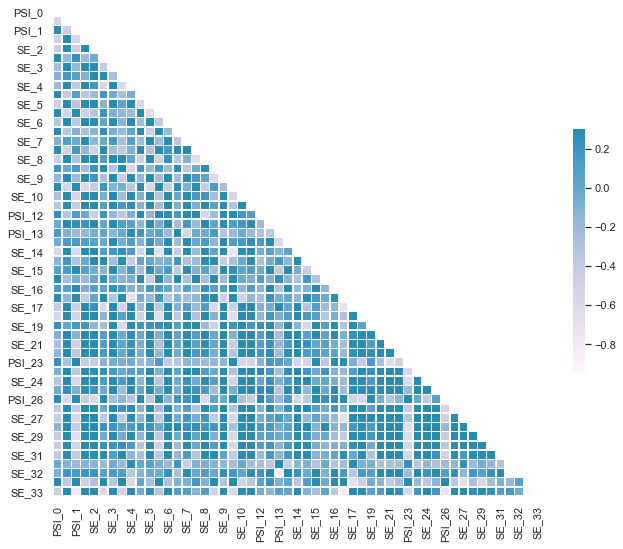

In [16]:
#Compute the alpha PSIs of 34 channels, using 1024 as the segment size, as depicted above, and save the alpha PSIs 
#in a data frame of 34 columns. Repeat this for each of the 3 data frames.
# prePSI = compPSI(eeg_pre)
# medPSI = compPSI(eeg_med)
# postPSI = compPSI(eeg_post)

# #labels
# preLabels = ['Pre'] * prePSI.shape[0]
# medLabels = ['Med'] * medPSI.shape[0]
# postLabels = ['Post'] * postPSI.shape[0]

# #4.	Combine 3 data frames into one by vertical stacking.
# eegT = pd.concat([prePSI, medPSI, postPSI], ignore_index=True)
# labels = preLabels + medLabels + postLabels

#5.	Create a correlation coefficient matrix of the alpha PSIs of the 34 channels.
corrT = eegT.corr()

#6.	Remove co-linearity from the combined data frame, as depicted above.
column_titles = eegT.columns
column_titles_to_remove = []
column_index = 1 # we start with index 1 instead of zero. very important
for label, row in corrT.iterrows():   
    if column_index == len(column_titles):
        break        
    if column_titles[column_index] in column_titles_to_remove:
        column_index += 1
        continue    
    inner_index = column_index+1
    for corr in row[inner_index:]:
        if corr < -0.9 or corr > 0.9:
            if column_titles[inner_index] not in column_titles_to_remove:
                column_titles_to_remove.append(column_titles[inner_index])
        inner_index += 1;
    column_index += 1   
len(column_titles_to_remove)
psiT = eegT.drop(columns = column_titles_to_remove, axis=1)

#7.	Print the correlation coefficient matrix of the alpha PSIs of the remaining channels.
corrPSI = psiT.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrPSI, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = plt.cm.PuBuGn

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrPSI, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
#print df
psiT

,PSI_0,SE_0,PSI_1,SE_1,SE_2,PSI_3,SE_3,PSI_4,SE_4,PSI_5,...,SE_26,SE_27,SE_28,SE_29,SE_30,SE_31,PSI_32,SE_32,PSI_33,SE_33
0,1.526756e+06,0.769180,7.620075e+07,0.622816,0.608633,9.484152e+07,0.612019,8.391162e+06,0.637490,1.790835e+06,...,0.620178,0.713750,0.736263,0.697077,0.615985,0.639960,260933.782515,0.785814,148824.185617,0.781301
1,1.539826e+06,0.763377,7.877953e+07,0.592771,0.593690,9.761566e+07,0.587047,8.573119e+06,0.636423,1.829304e+06,...,0.606277,0.706227,0.729063,0.705696,0.592355,0.616385,260628.510299,0.792202,145584.955575,0.779173
2,1.732088e+06,0.705265,7.540716e+07,0.635069,0.624637,9.456037e+07,0.622089,8.325006e+06,0.648053,1.991276e+06,...,0.641510,0.636252,0.654686,0.659808,0.630841,0.647910,266461.298978,0.790319,139719.687266,0.788166
3,1.532740e+06,0.767383,7.668007e+07,0.613960,0.603729,9.552440e+07,0.606658,8.475438e+06,0.633062,1.815699e+06,...,0.610637,0.726887,0.734801,0.702825,0.610248,0.624360,272527.269838,0.782341,143489.489617,0.783460
4,1.515721e+06,0.760796,7.829716e+07,0.590362,0.592594,9.728992e+07,0.590133,8.508907e+06,0.634149,1.823088e+06,...,0.612631,0.712250,0.730240,0.715616,0.597748,0.609028,264948.216618,0.793623,143676.579800,0.783707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,1.088321e+06,0.706713,1.203009e+06,0.700393,0.725707,2.141387e+08,0.594296,1.892618e+08,0.594343,1.677125e+05,...,0.688392,0.635891,0.674568,0.696756,0.681162,0.763195,389207.054817,0.793919,319082.515733,0.783671
24554,1.053418e+06,0.705767,1.159306e+06,0.702150,0.738787,2.104026e+08,0.610043,1.866904e+08,0.606094,1.845622e+05,...,0.676541,0.664213,0.723856,0.732602,0.741751,0.720967,381715.004561,0.789163,319720.955634,0.799730
24555,1.049970e+06,0.712286,1.160118e+06,0.707705,0.746216,2.184789e+08,0.572320,1.933661e+08,0.568316,1.760026e+05,...,0.672853,0.664308,0.721193,0.725169,0.744034,0.716916,418714.562454,0.779663,333283.956358,0.799171
24556,1.090493e+06,0.705619,1.211138e+06,0.695731,0.730497,2.140788e+08,0.601018,1.891671e+08,0.600422,1.653206e+05,...,0.682426,0.625209,0.663886,0.692846,0.678660,0.760711,406133.082832,0.803847,340918.422623,0.786372


In [28]:
# from sklearn import preprocessing
minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# We are normalizing all the numeric columns, excluding status columns
psiT_Norm = minmaxscaler.fit_transform(psiT)

#bdf_nor = minmaxscaler.fit_transform(bdf_new.iloc[:,:5])
psiT_Norm = pd.DataFrame(psiT_Norm)

In [29]:
#normalizing data set "psiT"
# def normalize(df) :
#     scaler = MinMaxScaler()
#     length = df.shape[1]
#     column_names_to_normalize = df.columns[0 :length]
#     x = df[column_names_to_normalize].values
#     x_scaled = scaler.fit_transform ( x )
#     df_normalize = pd.DataFrame ( x_scaled, columns=column_names_to_normalize,index=df.index )
#     return df_normalize

# psiT_Norm = normalize(psiT)

#Randomly sample 80% of each dataset and save them in a training dataset, and save the remaining 20% of 
#each dataset in a testing dataset. Split the list of labels accordingly

psiT_train, psiT_test, labels_train, labels_test, = train_test_split(psiT_Norm, labels, random_state = 0, test_size = 0.2)

In [30]:
#print df
psiT_train

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
5253,0.138555,0.000206,0.203976,0.118515,0.254449,0.179989,0.240072,0.048385,0.228808,0.302706,...,0.343112,0.287948,0.363129,0.279767,0.354779,0.296882,0.305662,0.559254,0.130825,0.783134
11389,0.002767,0.154626,0.006465,0.111644,0.156942,0.003699,0.150092,0.003386,0.682225,0.002034,...,0.106606,0.352029,0.081553,0.447980,0.112275,0.200173,0.948641,0.138919,0.075755,0.849270
1021,0.030077,0.601482,0.009319,0.674605,0.668332,0.029974,0.672083,0.086425,0.549194,0.288222,...,0.510252,0.554660,0.634487,0.756335,0.482123,0.491647,0.098005,0.846519,0.104243,0.879758
2220,0.092354,0.228856,0.190141,0.201207,0.204541,0.033953,0.302502,0.083060,0.265233,0.032774,...,0.169902,0.180822,0.175830,0.181075,0.186526,0.170960,0.032960,0.856442,0.133811,0.847215
8296,0.878967,0.142737,0.185644,0.169603,0.224375,0.283249,0.148212,0.096955,0.229533,0.795621,...,0.265497,0.263885,0.299884,0.335765,0.268736,0.264231,0.438101,0.497820,0.243046,0.706311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.292094,0.284143,0.600739,0.261729,0.260965,0.151750,0.314051,0.295408,0.259421,0.066094,...,0.239250,0.243192,0.220431,0.246166,0.263828,0.258277,0.248138,0.686506,0.571135,0.231289
19648,0.000889,0.368021,0.002475,0.335460,0.468588,0.227285,0.075378,0.697582,0.051697,0.000970,...,0.310376,0.278735,0.467035,0.552734,0.564133,0.624791,0.370247,0.450536,0.320936,0.602762
9845,0.002233,0.434762,0.005219,0.551347,0.297986,0.002973,0.325275,0.003288,0.636048,0.001050,...,0.341731,0.607603,0.243091,0.372880,0.297453,0.317778,0.702480,0.375793,0.062255,0.806550
10799,0.002234,0.363611,0.005354,0.428695,0.256965,0.003010,0.298043,0.002794,0.783282,0.001338,...,0.238988,0.660352,0.208397,0.475653,0.237826,0.294822,0.740994,0.292981,0.059809,0.815384


In [31]:
#print labels
labels_train.tail

['Med',
 'Med',
 'Pre',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Pre',
 'Med',
 'Post',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Post',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Post',
 'Post',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Post',
 'Med',
 'Med',
 'Post',
 'Post',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Post',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Post',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Med',
 'Med',
 'Med',
 'Pre',
 'Post',
 'Med',
 'Med',
 'Med'

### KNN Model Application - 

Now that the data has been prepped, the KNN model is applied. 

0.9995928338762216
              precision    recall  f1-score   support

         Med       1.00      1.00      1.00      3767
        Post       1.00      1.00      1.00       554
         Pre       1.00      1.00      1.00       591

    accuracy                           1.00      4912
   macro avg       1.00      1.00      1.00      4912
weighted avg       1.00      1.00      1.00      4912



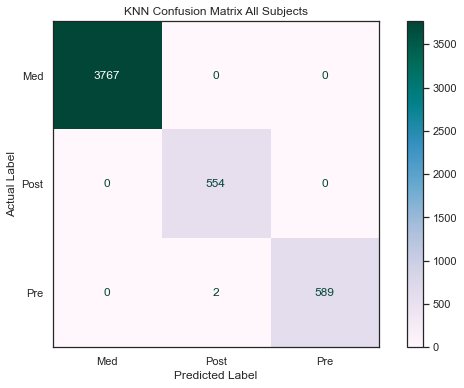

In [36]:
#kNN Model Applicaton

#print(math.sqrt(len(labels_test)))
classifier = KNeighborsClassifier(n_neighbors = 5, p=2)

#fitting the model
classifier.fit(psiT_train, labels_train)

#predicts labels for psiT_test
pred = classifier.predict(psiT_test)

#confusion matrix
matrix = plot_confusion_matrix(classifier, psiT_test,labels_test, cmap = plt.cm.PuBuGn)
matrix.ax_.set_title('KNN Confusion Matrix All Subjects')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.gcf().set_size_inches(10,6)

print(accuracy_score(labels_test, pred)) #shows how accurate model was at predicting

print(classification_report(labels_test, pred))

Text(0.5, 1.0, 'Value of K and its affect on Accuracy')

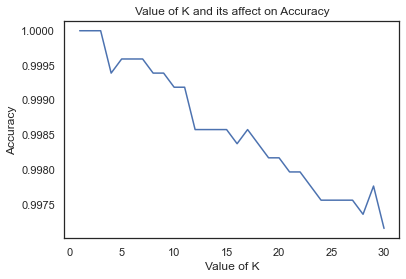

In [33]:
# try K=1 through K=30 and record testing accuracy

k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(psiT_train, labels_train)
    y_pred = knn.predict(psiT_test)
    scores.append(accuracy_score(labels_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Value of K and its affect on Accuracy')

### Multinomial Naive Bayes - 

Now that the data has been prepped, the Multinomial Naive Bayes model is applied. 

0.8731677524429967
              precision    recall  f1-score   support

         Med       0.86      1.00      0.93      3767
        Post       0.94      0.43      0.59       554
         Pre       0.96      0.48      0.64       591

    accuracy                           0.87      4912
   macro avg       0.92      0.64      0.72      4912
weighted avg       0.88      0.87      0.85      4912



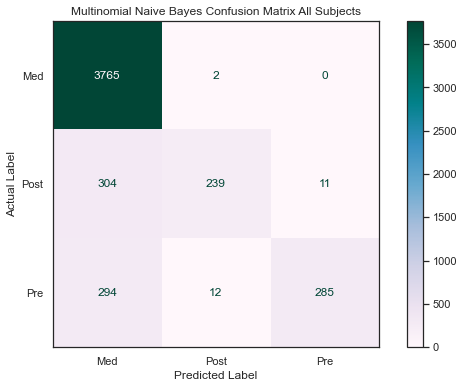

In [37]:
#Multinomial Naive Bayes

#defining the model
mnb = MultinomialNB(alpha = 1)

#fitting the model
mnb.fit(psiT_train, labels_train)

#predicts labels for psiT_test
pred_nb = mnb.predict(psiT_test) 

matrix_nb = plot_confusion_matrix(mnb, psiT_test,labels_test, cmap = plt.cm.PuBuGn)
matrix_nb.ax_.set_title('Multinomial Naive Bayes Confusion Matrix All Subjects')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.gcf().set_size_inches(10,6)

print(accuracy_score(labels_test, pred_nb))
print(classification_report(labels_test, pred_nb))


### Gaussian Naive Bayes - 

Now that the data has been prepped, the Gaussian Naive Bayes model is applied. 

0.9657980456026058
              precision    recall  f1-score   support

         Med       1.00      0.99      1.00      3767
        Post       0.93      0.75      0.83       554
         Pre       0.81      0.98      0.89       591

    accuracy                           0.97      4912
   macro avg       0.91      0.91      0.91      4912
weighted avg       0.97      0.97      0.97      4912



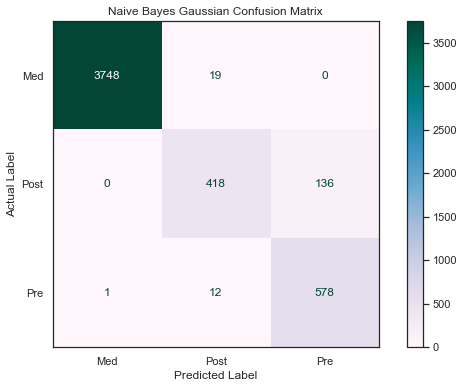

In [38]:
#defining the model
gnb = GaussianNB()

#fitting the model
gnb.fit(psiT_train, labels_train)

#predicts labels for psiT_test
pred_gnb = gnb.predict(psiT_test) 


matrix_nb = plot_confusion_matrix(gnb, psiT_test,labels_test, cmap = plt.cm.PuBuGn)
matrix_nb.ax_.set_title('Naive Bayes Gaussian Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.gcf().set_size_inches(10,6)

print(accuracy_score(labels_test, pred_gnb))
print(classification_report(labels_test, pred_gnb))

### Linear Discriminant Analysis - 

Now that the data has been prepped, the LDA model is applied. 

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
lda = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#fitting the model
lda.fit(psiT_train, labels_train)

#predicts labels for psiT_test
pred_lda = lda.predict(psiT_test) 

0.9888029315960912
              precision    recall  f1-score   support

         Med       1.00      1.00      1.00      3767
        Post       0.98      0.92      0.95       554
         Pre       0.93      0.99      0.95       591

    accuracy                           0.99      4912
   macro avg       0.97      0.97      0.97      4912
weighted avg       0.99      0.99      0.99      4912



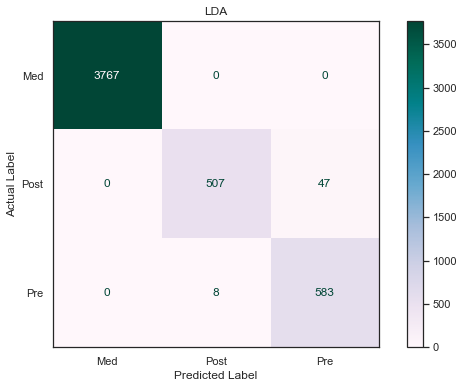

In [41]:
matrix_nb = plot_confusion_matrix(lda, psiT_test,labels_test, cmap = plt.cm.PuBuGn)
matrix_nb.ax_.set_title('LDA')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.gcf().set_size_inches(10,6)

print(accuracy_score(labels_test, pred_lda))
print(classification_report(labels_test, pred_lda))

### Conclusion - 

All models worked fairly well to classify the Pre-meditation, Meditation, and Post-meditation data all with an accuracy of above 0.87. The ability of the models to successfully classify the three phases indicates that there is a difference in the data that was collected in each phase, which in turn suggests that meditation affects brain performance in some way. 